# Exercise: Clustering Algorithms with Scikit Learn
# By: Christian Wegert
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

In [49]:
A

array([[-0.64768335, -0.85224442],
       [-0.28328406, -0.44979818],
       [-0.46053354,  0.20591081],
       ...,
       [ 0.15512367, -0.48348607],
       [ 0.25493702, -1.01409147],
       [ 0.46739354, -0.39157645]])

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

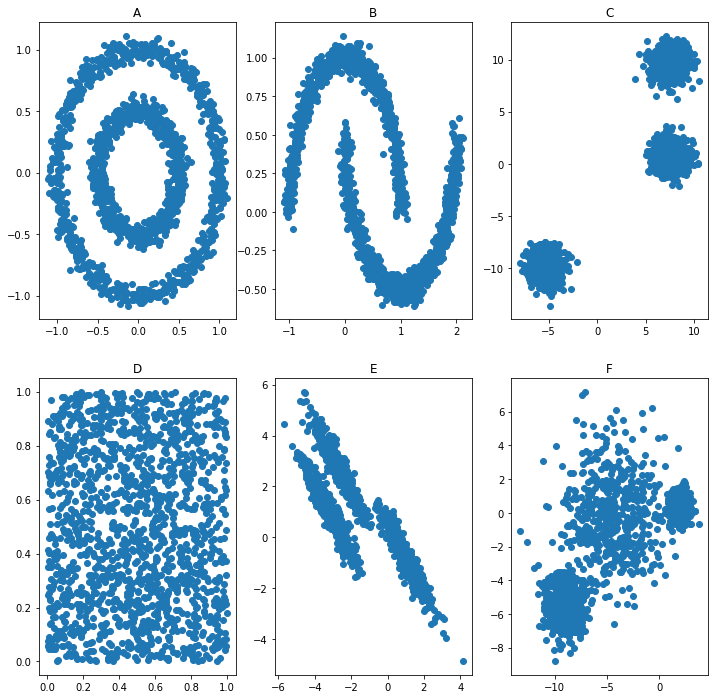

In [51]:
fig, ax = plt.subplots(2, 3, figsize=(12,12))


ax[0, 0].scatter(A[:,0], A[:,1])  #row=0, col=0
ax[0, 0].set_title('A')

ax[0, 1].scatter(B[:,0], B[:,1])   
ax[0, 1].set_title('B')

ax[0, 2].scatter(C[:,0], C[:,1])  
ax[0, 2].set_title('C')

ax[1, 0].scatter(D[:,0], D[:,1])
ax[1, 0].set_title('D')

ax[1, 1].scatter(E[:,0], E[:,1])
ax[1, 1].set_title('E')

ax[1, 2].scatter(F[:,0], F[:,1])
ax[1, 2].set_title('F') 
plt.show()

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

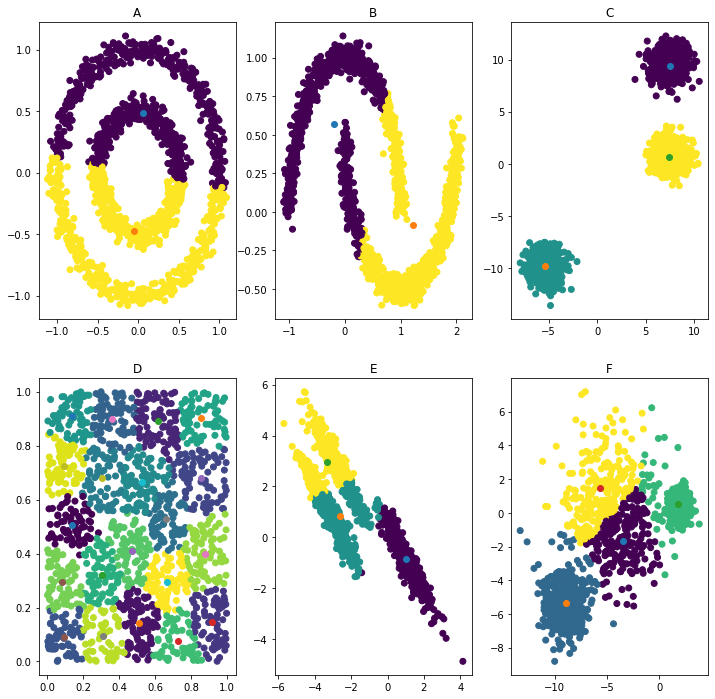

In [147]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 3, figsize=(12,12))

k = 2
kmeans = KMeans(n_clusters=k, init='k-means++').fit(A)
y_kmeans = kmeans.predict(A)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[0, 0].scatter(A[:,0], A[:,1], c=y_kmeans)  #row=0, col=0
ax[0, 0].set_title('A')
for i in range(k):
    ax[0,0].scatter(centers[i,0], centers[i,1])

k = 2
kmeans = KMeans(n_clusters=k, init='k-means++').fit(B)
y_kmeans = kmeans.predict(B)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[0, 1].scatter(B[:,0], B[:,1], c=y_kmeans)   
ax[0, 1].set_title('B')
for i in range(k):
    ax[0,1].scatter(centers[i,0], centers[i,1])

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++').fit(C)
y_kmeans = kmeans.predict(C)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[0, 2].scatter(C[:,0], C[:,1], c=y_kmeans)  
ax[0, 2].set_title('C')
for i in range(k):
    ax[0,2].scatter(centers[i,0], centers[i,1])

k = 20
kmeans = KMeans(n_clusters=k, init='k-means++').fit(D)
y_kmeans = kmeans.predict(D)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[1, 0].scatter(D[:,0], D[:,1], c=y_kmeans)
ax[1, 0].set_title('D')
for i in range(k):
    ax[1,0].scatter(centers[i,0], centers[i,1])

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++').fit(E)
y_kmeans = kmeans.predict(E)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[1, 1].scatter(E[:,0], E[:,1], c=y_kmeans)
ax[1, 1].set_title('E')
for i in range(k):
    ax[1,1].scatter(centers[i,0], centers[i,1])
    
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++').fit(F)
y_kmeans = kmeans.predict(F)
centers=kmeans.cluster_centers_
labels=kmeans.labels_ 
ax[1, 2].scatter(F[:,0], F[:,1], c=y_kmeans)
ax[1, 2].set_title('F') 
for i in range(k):
    ax[1,2].scatter(centers[i,0], centers[i,1])
plt.show()


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


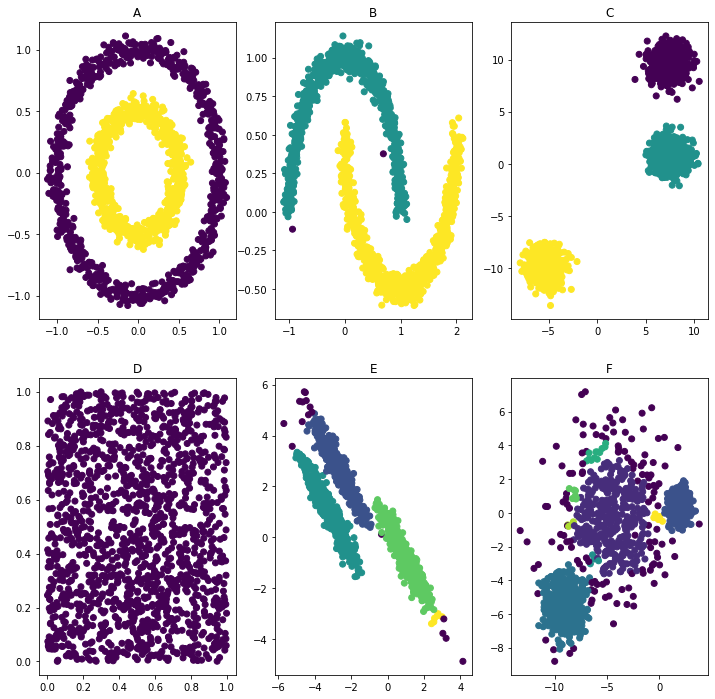

In [209]:
from sklearn.cluster import DBSCAN


fig, ax = plt.subplots(2, 3, figsize=(12,12))

epsilon = 0.1
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(A)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(A)
ax[0, 0].scatter(A[:,0], A[:,1], c=y_pred)  #row=0, col=0
ax[0, 0].set_title('A')

epsilon = 0.1
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(B)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(B)
ax[0, 1].scatter(B[:,0], B[:,1], c=y_pred)  #row=0, col=0
ax[0, 1].set_title('B')

epsilon = 2
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(C)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(C)
ax[0, 2].scatter(C[:,0], C[:,1], c=y_pred)  #row=0, col=0
ax[0, 2].set_title('C')

epsilon = 0.1
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(D)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(D)
ax[1, 0].scatter(D[:,0], D[:,1], c=y_pred)  #row=0, col=0
ax[1, 0].set_title('D')

epsilon = 0.3
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(E)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(E)
ax[1, 1].scatter(E[:,0], E[:,1], c=y_pred)  #row=0, col=0
ax[1, 1].set_title('E')

epsilon = 0.5
clustering = DBSCAN(eps=epsilon, min_samples=5).fit(F)
labels = clustering.labels_ 
y_pred = clustering.fit_predict(F)
ax[1, 2].scatter(F[:,0], F[:,1], c=y_pred)  #row=0, col=0
ax[1, 2].set_title('F')

plt.show()